# 鸢尾花 调库

In [72]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 加载鸢尾花数据集
iris = load_iris()
X, y = iris.data, iris.target


In [73]:
# 设置Matplotlib使用的字体为系统默认的中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [74]:
# 使用K-means进行聚类
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# 打印聚类结果
print("K-means 聚类标签:", kmeans_labels)


K-means 聚类标签: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


C:\Users\zhj20\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


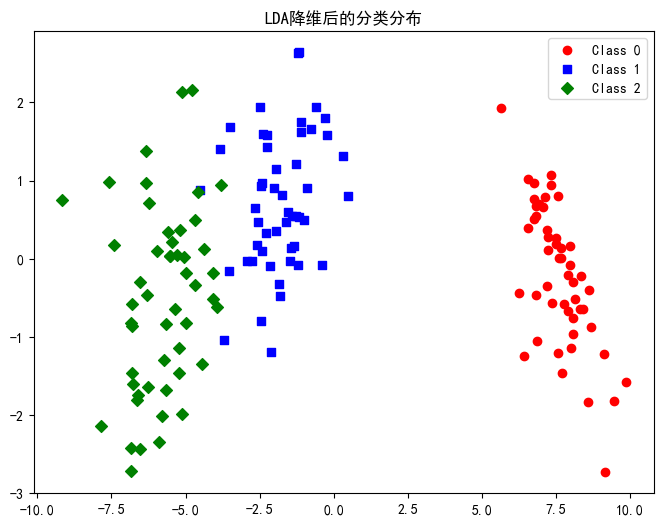

In [75]:
# 使用LDA降维到2D
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X, y)

# 绘制LDA降维后的数据分布
plt.figure(figsize=(8, 6))
for label, marker, color in zip(range(3), ('o', 's', 'D'), ('red', 'blue', 'green')):
    plt.scatter(X_lda[y == label, 0], X_lda[y == label, 1], label=f"Class {label}", marker=marker, color=color)
plt.title("LDA降维后的分类分布")
plt.legend()
plt.show()


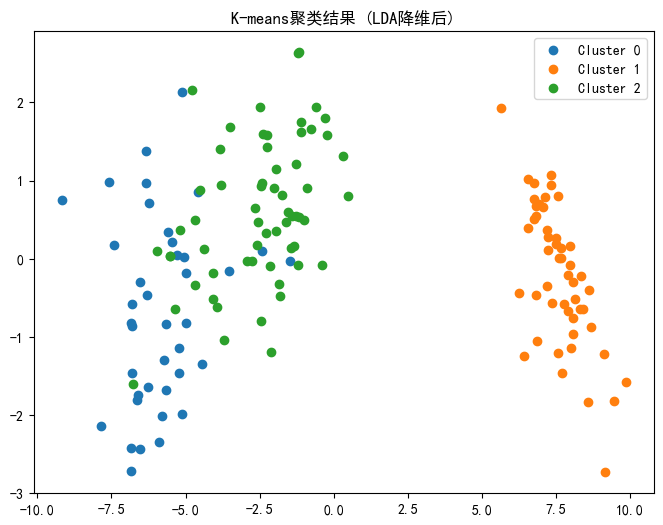

In [76]:
# 绘制K-means的聚类结果
plt.figure(figsize=(8, 6))
for cluster in range(3):
    plt.scatter(X_lda[kmeans_labels == cluster, 0], X_lda[kmeans_labels == cluster, 1], label=f"Cluster {cluster}")
plt.title("K-means聚类结果 (LDA降维后)")
plt.legend()
plt.show()

# 选做

In [77]:
def kmeans(X, k, max_iters=100, tol=1e-4):
    """
    自实现K-means算法
    :param X: 输入数据 (样本数, 特征数)
    :param k: 聚类的簇数
    :param max_iters: 最大迭代次数
    :param tol: 收敛阈值
    :return: 聚类标签和簇中心
    """
    np.random.seed(42)
    # 随机初始化簇中心
    centers = X[np.random.choice(X.shape[0], k, replace=False)]
    labels = np.zeros(X.shape[0])
    
    for iteration in range(max_iters):
        # 分配样本到最近的中心
        for i, sample in enumerate(X):
            distances = np.linalg.norm(sample - centers, axis=1)
            labels[i] = np.argmin(distances)
        
        # 计算新的簇中心
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # 检查是否收敛
        if np.linalg.norm(new_centers - centers) < tol:
            break
        
        centers = new_centers
    
    return labels, centers

In [78]:
def kmeans_pp_init(X, k):
    """
    使用 K-means++ 方法初始化簇中心。
    
    :param X: 数据集，形状为 (样本数, 特征数)，包含多个样本和其对应的特征。
    :param k: 簇的数量，即希望生成的初始中心数目。
    :return: 初始化的簇中心，形状为 (k, 特征数)。
    """
    np.random.seed(42)  # 设置随机种子，保证结果可复现
    n_samples = X.shape[0]  # 数据集中的样本数量
    centers = []  # 用于存储初始化的簇中心
    
    # Step 1: 随机选择第一个中心
    # 从数据集中随机选择一个样本作为第一个簇中心
    first_center = X[np.random.choice(n_samples)]
    centers.append(first_center)
    
    # Step 2: 逐步选择剩余的 k-1 个中心
    for _ in range(k - 1):
        # 计算每个样本到最近一个已选择中心的平方距离
        # 对于每个中心，计算所有样本到它的距离，然后取这些距离的最小值
        distances = np.min([np.linalg.norm(X - center, axis=1)**2 for center in centers], axis=0)
        
        # 根据距离分布计算每个样本作为中心的概率
        probabilities = distances / distances.sum()
        
        # 按概率分布随机选择下一个簇中心
        next_center = X[np.random.choice(n_samples, p=probabilities)]
        centers.append(next_center)
    
    return np.array(centers)  # 返回初始化的簇中心数组

In [79]:
def kmeans_with_pp(X, k, max_iters=100, tol=1e-4):
    """
    自实现 K-means 聚类算法，使用 K-means++ 方法初始化簇中心。
    
    :param X: 数据集，形状为 (样本数, 特征数)。
    :param k: 簇的数量。
    :param max_iters: 最大迭代次数，用于控制算法的执行上限。
    :param tol: 收敛阈值，当簇中心更新的移动距离小于此值时停止迭代。
    :return: 聚类标签和簇中心，其中：
             - labels: 聚类标签数组，形状为 (样本数,)。
             - centers: 最终的簇中心，形状为 (k, 特征数)。
    """
    # Step 1: 使用 K-means++ 初始化簇中心
    centers = kmeans_pp_init(X, k)
    
    # 初始化每个样本的标签，labels 用于记录样本所属的簇
    labels = np.zeros(X.shape[0])
    
    # Step 2: 开始迭代更新簇中心
    for iteration in range(max_iters):
        # Step 2.1: 将样本分配到最近的簇中心
        for i, sample in enumerate(X):  # 遍历每个样本
            # 计算样本到所有簇中心的欧几里得距离
            distances = np.linalg.norm(sample - centers, axis=1)
            # 将样本分配给距离最近的簇
            labels[i] = np.argmin(distances)
        
        # Step 2.2: 计算新的簇中心
        # 按照样本分配结果，计算每个簇的平均位置作为新的簇中心
        new_centers = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Step 2.3: 检查是否收敛
        # 如果所有簇中心的移动距离小于收敛阈值 tol，则停止迭代
        if np.linalg.norm(new_centers - centers) < tol:
            break  # 收敛条件满足，退出循环
        
        # 更新簇中心为新计算的值
        centers = new_centers
    
    # 返回最终的聚类标签和簇中心
    return labels, centers

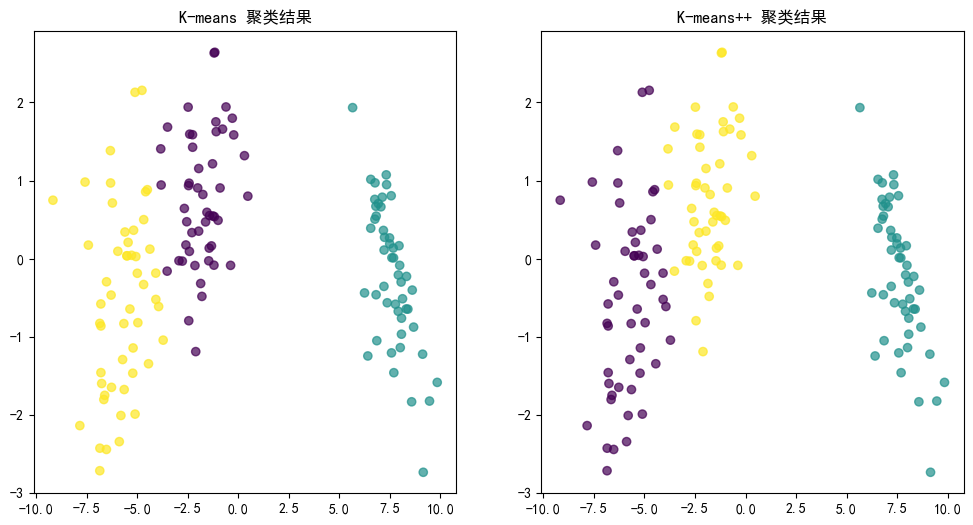

In [83]:
k = 3  # 鸢尾花数据集有3类

# K-means
labels_kmeans, centers_kmeans = kmeans(X_lda, k)
# K-means++
labels_kmeans_pp, centers_kmeans_pp = kmeans_with_pp(X_lda, k)

# 可视化
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=labels_kmeans, cmap='viridis', alpha=0.7)
plt.title("K-means 聚类结果")

plt.subplot(1, 2, 2)
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=labels_kmeans_pp, cmap='viridis', alpha=0.7)
plt.title("K-means++ 聚类结果")

plt.show()


# 评价

In [93]:
from sklearn.metrics import silhouette_score

# 计算 SSE
sse_kmeans = np.sum((X_lda - centers_kmeans[labels_kmeans.astype(int)])**2)
sse_kmeans_pp = np.sum((X_lda - centers_kmeans_pp[labels_kmeans_pp.astype(int)])**2)

print(f"K-means SSE: {sse_kmeans:.10f}")
print(f"K-means++ SSE: {sse_kmeans_pp:.10f}")


K-means SSE: 286.0310573050
K-means++ SSE: 286.0310573050


In [94]:
# 计算轮廓系数
sil_kmeans = silhouette_score(X_lda, labels_kmeans)
sil_kmeans_pp = silhouette_score(X_lda, labels_kmeans_pp)

print(f"K-means Silhouette Score: {sil_kmeans:.10f}")
print(f"K-means++ Silhouette Score: {sil_kmeans_pp:.10f}")

K-means Silhouette Score: 0.6558160584
K-means++ Silhouette Score: 0.6558160584
